# Assignment-2 by Varij Dave (100855095)

In [12]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# 1. Take a quick look at the data structure using head, info, and describe.

In [13]:
#load dataset
df = pd.read_csv('https://raw.githubusercontent.com/varijdave/AI-Algorithm/main/winequality-red.csv',sep=';')
#use head
print(df.head())
#use info
print(df.info())
#use describe
print(df.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

# 2. Print the correlation matrix between quality and the other attributes.

In [14]:
#Correlation matrix
corr_matrix = df.corr()
print(corr_matrix["quality"].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


# 3. Find the value_counts of the quality attribute.

In [15]:
#value count of quality attribute
print(df["quality"].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


# 4. Split the data into 80% training set and 20% testing set, and print the shape of X_train, y_train, X_test, and y_test.

In [16]:
#train-test split
X = df.drop(['quality'],axis=1)
y = df['quality']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1279, 11)
(1279,)
(320, 11)
(320,)


# 5. Train a svm model (we will call it model1) to predict the quality of wine on the training set using: kernel = rbf, gamma = 1, and C =1.

In [17]:
#train SVM model1
model1 = SVC(kernel='rbf',gamma=1,C=1)
model1.fit(X_train,y_train)

SVC(C=1, gamma=1)

# 6. Test your model on the test set, and report the classification_report on the y_test and y_predict.

In [18]:
#test model1 and report classification report
y_predict = model1.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.49      0.87      0.63       130
           6       0.53      0.31      0.39       132
           7       1.00      0.29      0.44        42
           8       0.00      0.00      0.00         5

    accuracy                           0.52       320
   macro avg       0.34      0.24      0.24       320
weighted avg       0.55      0.52      0.47       320



d:\AI Algorithm\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\AI Algorithm\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\AI Algorithm\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 7. Plot the confusion matrix of your test results using ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

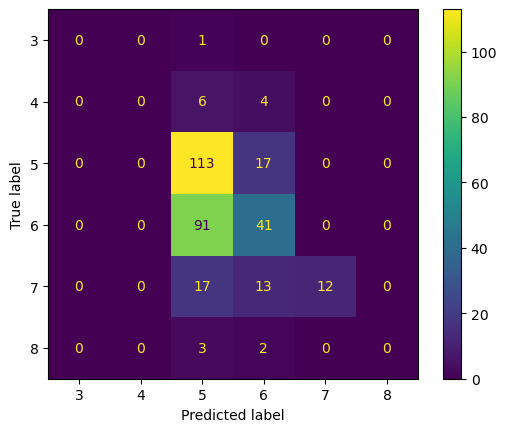

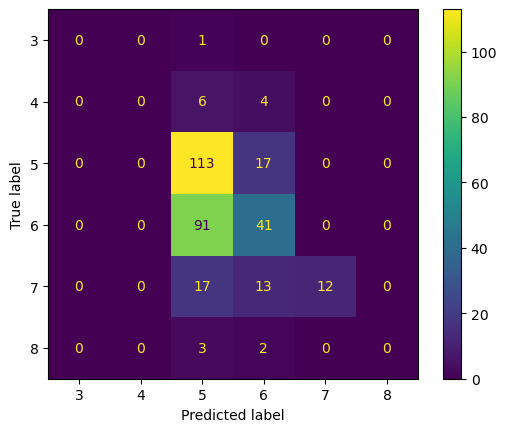

In [19]:
#plot confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
disp.plot()

# 8. Train a svm model with the same kernel and gamma values but with a smaller value of C (e.g., C=0.01), and only report the classification_report. We will refer to this model as model2.

In [20]:
#train SVM model2
model2 = SVC(kernel='rbf',gamma=1,C=0.01)
model2.fit(X_train,y_train)
#report classification report
y_predict2 = model2.predict(X_test)
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.41      1.00      0.58       130
           6       0.00      0.00      0.00       132
           7       0.00      0.00      0.00        42
           8       0.00      0.00      0.00         5

    accuracy                           0.41       320
   macro avg       0.07      0.17      0.10       320
weighted avg       0.17      0.41      0.23       320



d:\AI Algorithm\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\AI Algorithm\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\AI Algorithm\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 9. Train a svm model with the same kernel and gamma values but with a larger value of C (e.g., C=10), and only report the classification_report. We will refer to this model as model3.

In [21]:
#train SVM model3
model3 = SVC(kernel='rbf',gamma=1,C=10)
model3.fit(X_train,y_train)
#report classification report
y_predict3 = model3.predict(X_test)
print(classification_report(y_test,y_predict3))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.50      0.85      0.63       130
           6       0.55      0.36      0.43       132
           7       1.00      0.31      0.47        42
           8       0.00      0.00      0.00         5

    accuracy                           0.53       320
   macro avg       0.34      0.25      0.26       320
weighted avg       0.56      0.53      0.50       320



d:\AI Algorithm\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\AI Algorithm\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\AI Algorithm\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 10. Evaluate model1 using cross validation with cv=5. Report on the cross_val_score, and the mean of the accuracy scores.

In [22]:
#cross validation on model1
cv_scores = cross_val_score(model1,X_train,y_train,cv=5)
print(cv_scores)
print(np.mean(cv_scores))

[0.56640625 0.56640625 0.5703125  0.58203125 0.57647059]
0.5723253676470588


# 11. Why do you think your model is not performing well? Is it the algorithm? The data? Or something else?

#conclusion
It shows that the red wine dataset has lower quality scores and larger volatility in the quality attribute when compared to the white wine dataset. This could be a factor in the SVM model's poor performance on this dataset. Another factor can be the method selected; SVM might not be the best option for this particular dataset. As a result, testing a new technique, such Random Forest or Gradient Boosting, might enhance the performance of the model.